In [1]:
import cvzone
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm  
# deep learning libraries
import tensorflow as tf
import keras
import  pickle
import time
import imutils
from imutils.video import VideoStream
from imutils.video import FPS
import queue, threading
import cv2
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

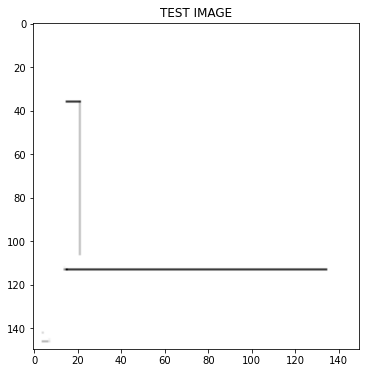

In [2]:

test_img_path = '0e1a3d4b-9867-3b9c-a8f3-17ba252a5166.bmp'
  
img = cv2.imread(test_img_path)
# print(img)
resized_img = cv2.resize(img, (150, 150)).reshape(-1, 150, 150, 3)/255
  
plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

In [3]:
filepath = 'my_model'
# import h5py

# f = h5py.File(filepath, 'r')
# print(f.attrs.get('keras_version'))
# # Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model(filepath)



In [5]:
# pickle_out= open("model_trained.p", "wb")
# pickle.dump(new_model,pickle_out)
# pickle_out.close()

In [8]:
train_path ='Y:/Rafiq/Research/ML/DatasetSorted/train'
test_path = 'Y:/Rafiq/Research/ML/DatasetSorted/val'
img_width = 150
img_height = 150
batchsize = 32
root = pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)
# with open('classes.txt', 'x') as f:
#     for item in classes:
#         f.write("%s\n" % item)

['0 Standard', '1 Dowels', '10 Round', '11 Round tube', '12 T', '13 U', '14 Z', '15 Steel', '16 Flat', '17 HEA', '18 IPE', '19 L', '2 Nut', '20 Square', '21 Square tube', '22 Rectangle tube', '23 Round', '24 Round tube', '25 T', '26 U', '27 Hat profile', '28 BU2 Profile', '29 ECO holder', '3 Washer', '30 F Profile', '31 KH 35   SZ 20', '32 NBK holder', '33 UBE NG', '34 Corners', '35 Accessories', '36 Tekofix profile', '37 Alkapo profile', '38 L Profile', '39 HWB consoles', '4 Aluminium', '40 Agraffe profile', '41 System UBE', '42 System UBEKA', '43 Targo UBE', '44 T wall bracket', '45 Thermal stop US and T', '46 Thermal stop', '47 U Alho profile', '48 U Profile', '49 WB', '5 Flat', '6 L', '7 Square', '8 Square tube', '9 Rectangle tube']


In [5]:
prediction = new_model.predict(resized_img)

In [6]:
print(prediction)

[[1.51063304e-08 1.32774141e-12 2.73747560e-15 2.96542237e-14
  1.12129319e-08 5.47785987e-07 3.67889504e-11 4.33468984e-15
  1.02697705e-10 1.68096889e-07 4.97767730e-11 9.99944687e-01
  2.06645180e-13 3.66358090e-11 1.12385457e-07 5.23168696e-11
  6.53659603e-15 1.10442081e-12 1.72527610e-08 3.76242948e-09
  3.63470330e-11 1.23484688e-15 3.93249470e-19 3.29931036e-20
  1.99607470e-16 4.73569850e-09 1.75529188e-23 3.30152029e-16
  1.22444210e-09 3.49969495e-23 5.59095955e-16 2.95170844e-15
  7.77626750e-16 1.14618251e-18 3.99689781e-16 6.95246591e-15
  5.54693807e-25 1.31072658e-16 6.95679962e-20 7.04841177e-12
  2.31254652e-17 2.09411095e-17 3.84382129e-17 2.66877185e-16
  5.23233366e-12 1.83491503e-12 5.45105831e-05 1.35344921e-11
  2.73523842e-10 1.37598732e-12]]


In [9]:
print(classes[np.argmax(prediction)])

19 L


In [28]:
class VideoCapture:

  def __init__(self, name):
    self.cap = cv2.VideoCapture(name)
    self.q = queue.Queue()
    t = threading.Thread(target=self._reader)
    t.daemon = True
    t.start()

  # read frames as soon as they are available, keeping only most recent one
  def _reader(self):
    while True:
      ret, frame = self.cap.read()
      if not ret:
        break
      if not self.q.empty():
        try:
          self.q.get_nowait()   # discard previous (unprocessed) frame
        except queue.Empty:
          pass
      self.q.put(frame)

  def read(self):
    return self.q.get()



In [43]:
vs = cap = VideoCapture(0)
# warm up the camera for a couple of seconds
time.sleep(2.0)
CLASSES = classes
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
# FPS: used to compute the (approximate) frames per second
# Start the FPS timer
fps = FPS().start()
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    time.sleep(.5) 
    # grab the frame from the threaded video stream and resize it to have a maximum width of 400 pixels
    # vs is the VideoStream
    frame = vs.read()
    frame = imutils.resize(frame, width=400)
    (h, w) = frame.shape[:2]
    resized_img = cv2.resize(frame, (150, 150)).reshape(-1, 150, 150, 3)/255
#     


    
    predictions = new_model.predict(resized_img)
#     print(classes[np.argmax(predictions)])
    predited = classes[np.argmax(predictions)]
# #     (startX, startY, endX, endY) = predictions[0]
    
#     # scale the predicted bounding box coordinates based on the image
#     # dimensions
#     startX = int(startX * w)
#     startY = int(startY * h)
#     endX = int(endX * w)
#     endY = int(endY * h)
    
    cv2.putText(frame, predited, (10,100), font, 1, (255, 255, 0), 2)
    
#     # draw the predicted bounding box on the image
#     cv2.rectangle(image, (startX, startY), (endX, endY),
#         (0, 255, 0), 2)
    
#  # show the output frame
    cv2.imshow("Frame", frame)

    # Now, let's code this logic (just 3 lines, lol)
    key = cv2.waitKey(1) & 0xFF

    # Press 'q' key to break the loop
    if key == ord("q"):
        break

    # update the FPS counter
    fps.update()

# stop the timer
fps.stop()

# Display FPS Information: Total Elapsed time and an approximate FPS over the entire video stream
print("[INFO] Elapsed Time: {:.2f}".format(fps.elapsed()))
print("[INFO] Approximate FPS: {:.2f}".format(fps.fps()))

# Destroy windows and cleanup
cv2.destroyAllWindows()
# Stop the video stream
vs.stop()


[INFO] Elapsed Time: 129.46
[INFO] Approximate FPS: 1.61


AttributeError: 'VideoCapture' object has no attribute 'stop'